# Data Analysis for Observed Data and Synthetic Data

This program serves to take some statistics of the observed data and the synthetic data created by getForcingFunctions, mainly for comparison.

### Observational Data Analysis

In [18]:
import numpy as np 
import matplotlib.pyplot as plt 
import xarray as xr 
import glob 
import scipy.stats as sts

from getStats import getRemoveDefects

In [35]:
def getDailyMeanMaxSkew(filelist):
    
    N_files = len(filelist)
    
    for i in range(0, N_files):
        
        print(i)
        
        tmp_ds = xr.open_dataset(filelist[i])
        
        tmp_rad = tmp_ds["BestEstimate_down_short_hemisp"].values
        
        tmp_rad_daysplit = np.split(tmp_rad, 92)
        
        tmp_rad_daysplit_clean = []
        tmp_mean_array = []
        tmp_max_array = []
        tmp_skew_array = []
        
        N_days = len(tmp_rad_daysplit)
        
        for i in range(0, N_days):
            tmp_rad_daysplit_clean.append(getRemoveDefects(tmp_rad_daysplit[i]))
            
        for j in range(0, N_days):
            #print(tmp_rad_daysplit_clean[j])
            tmp_mean_array.append(np.mean(tmp_rad_daysplit_clean[j]))
            tmp_max_array.append(np.amax(tmp_rad_daysplit_clean[j]))
            tmp_skew_array.append(sts.skew(tmp_rad_daysplit_clean[j]))
        
    return tmp_mean_array, tmp_max_array, tmp_skew_array

In [36]:
PATH = "/data/keeling/a/adammb4/SGP_proj_2021/DATA/"
rad_data_filenames = glob.glob(PATH+"SGP_Best*")

mean, maxm, skew = getDailyMeanMaxSkew(rad_data_filenames)

0
1


ValueError: zero-size array to reduction operation maximum which has no identity

In [20]:
ds = xr.open_dataset(rad_data_filenames[0])
rad = ds["BestEstimate_down_short_hemisp"].values
rad_daysplit = np.split(rad, 92)

rad_daysplit_clean = []

for i in range (0,len(rad_daysplit)):
    tmp_rad = rad_daysplit[i]
    tmp_clean = getRemoveDefects(tmp_rad)
    rad_daysplit_clean.append(tmp_clean)

In [31]:
daily_mean_array = []
daily_max_array = []
daily_min_array = []
daily_skew_array = []

for i in range(0, len(rad_daysplit_clean)):
    tmp_mean = np.mean(rad_daysplit_clean[i])
    tmp_max = np.amax(rad_daysplit_clean[i])
    tmp_min = np.amin(rad_daysplit_clean[i])
    tmp_skew = sts.skew(rad_daysplit_clean[i])
    daily_mean_array.append(tmp_mean)
    daily_max_array.append(tmp_max)
    daily_min_array.append(tmp_min)
    daily_skew_array.append(tmp_skew)

max_peak = np.amax(daily_max_array)
min_peak = np.amin(daily_max_array)

len(daily_mean_array)

92

(array([ 1.,  0.,  1.,  3., 13., 31., 21., 13.,  5.,  4.]),
 array([ 698.0071 ,  755.78656,  813.56604,  871.3455 ,  929.125  ,
         986.9045 , 1044.684  , 1102.4634 , 1160.2429 , 1218.0225 ,
        1275.8019 ], dtype=float32),
 <BarContainer object of 10 artists>)

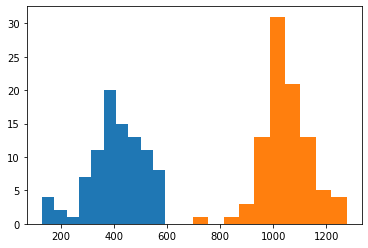

In [17]:
plt.hist(daily_mean_array)